In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats  # For statistical tests, including correlation significance
import seaborn as sns 
import matplotlib.pyplot as plt  

In [20]:
te_dhenat = pd.read_csv(r"C:\Users\user\Downloads\data.csv")


In [41]:
print(te_dhenat)

         Data  Dite qendrimi     Drenazh Gjinia  Grup mosha Initialet  \
0  2023-01-05              8  Pa drenazh      F          80       L.K   
1  2023-01-05             25  Me drenazh      M          50       M.B   
2  2023-01-13              3  Me drenazh      M          40       E.K   
3  2023-02-08             16  Me drenazh      F          30       K.P   
4  2023-02-16              8  Me drenazh      F          40       L.P   
5  2023-03-06             21  Me drenazh      M          10      XH.C   
6  2023-03-09              6  Me drenazh      M          60       G.Z   
7  2023-03-16              8  Pa drenazh      M          60       H.A   
8  2023-03-20              4  Me drenazh      M          80       P.N   
9  2023-04-05              1  Pa drenazh      M          30       E.K   
10 2023-04-16             31  Me drenazh      F          60     Dh.Xh   
11 2023-04-21             21  Me drenazh      F          30       Y.B   
12 2023-04-22             13  Me drenazh      M    

In [45]:
te_dhenat.dtypes

Data                datetime64[ns]
Dite qendrimi                int64
Drenazh                     object
Gjinia                      object
Grup mosha                   int64
Initialet                   object
Lloji i empiemes            object
Mosha                        int64
Vendbanimi                  object
dtype: object

In [47]:
te_dhenat['Data'] = pd.to_datetime(te_dhenat['Data'])

In [49]:
correlation = te_dhenat['Dite qendrimi'].corr(te_dhenat['Mosha'])


In [ ]:
#Koeficienti i korrelacionit prej -0.0507 sugjeron një lidhje shumë të dobët negative midis numrit të ditëve të kaluara në spital dhe moshës. Kjo nënkupton që, ndërsa mosha rritet, numri i ditëve që një person qëndron në spital priret të zvogëlohet pak, por lidhja nuk është e fortë.

#Në praktikë, një korrelacion afër zeros shpesh tregon se nuk ka një lidhje të rëndësishme lineare midis dy variablave. Mund të jetë e dobishme të eksploroni më tej këtë me analiza shtesë ose vizualizime, si p.sh. krijimi i një grafiku shpërndarjeje (scatter plot), për të parë nëse ka ndonjë model ose tendencë tjetër.

In [51]:
print("Correlation between days in hospital and age:", correlation)

Correlation between days in hospital and age: -0.05071262880131507


In [53]:
te_dhenat_2 = te_dhenat.copy()

In [149]:
te_dhenat_2 = te_dhenat_2[te_dhenat_2['Dite qendrimi'] != 99]

In [151]:
# Convert categorical columns to numerical values using label encoding
te_dhenat_2['Lloji i empiemes'] = te_dhenat['Lloji i empiemes'].astype('category').cat.codes

In [153]:
te_dhenat_2['Drenazh'] = te_dhenat['Drenazh'].astype('category').cat.codes


In [155]:
te_dhenat_2['Gjinia'] = te_dhenat['Gjinia'].astype('category').cat.codes


In [157]:
te_dhenat_2['Vendbanimi'] = te_dhenat['Vendbanimi'].astype('category').cat.codes

In [ ]:
te_dhenat_2 = te_dhenat_2.drop(columns=['Initialet'])

In [164]:
correlation_matrix = te_dhenat_2.corr()

In [166]:
print(correlation_matrix)

                  Dite qendrimi   Drenazh    Gjinia  Grup mosha  \
Dite qendrimi          1.000000 -0.273437 -0.166586    0.000876   
Drenazh               -0.273437  1.000000 -0.096182    0.136539   
Gjinia                -0.166586 -0.096182  1.000000    0.011611   
Grup mosha             0.000876  0.136539  0.011611    1.000000   
Lloji i empiemes       0.190848  0.118497  0.053646    0.012202   
Mosha                 -0.032300  0.140275  0.007921    0.987001   
Vendbanimi             0.261002 -0.085158 -0.025461    0.042919   

                  Lloji i empiemes     Mosha  Vendbanimi  
Dite qendrimi             0.190848 -0.032300    0.261002  
Drenazh                   0.118497  0.140275   -0.085158  
Gjinia                    0.053646  0.007921   -0.025461  
Grup mosha                0.012202  0.987001    0.042919  
Lloji i empiemes          1.000000 -0.018618    0.348385  
Mosha                    -0.018618  1.000000    0.055517  
Vendbanimi                0.348385  0.055517    1.

<function matplotlib.pyplot.show(close=None, block=None)>

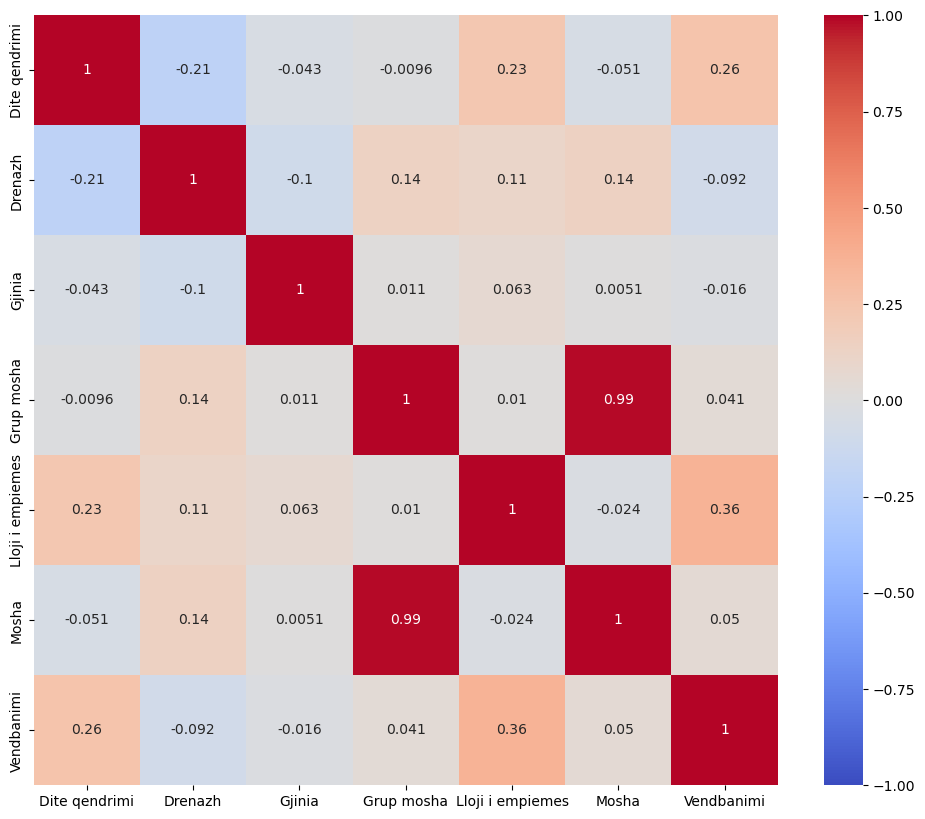

In [123]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.show

In [ ]:
# Vendbanimi has a weak positive correlation with Dite qendrimi (0.2553) and Lloji i empiemes (0.3598). This suggests that the location may slightly influence the type of empieme and the duration of the hospital stay.

# The correlation between Dite qendrimi and Lloji i empiemes is 0.2266, which suggests a weak positive relationship. This means that certain types of empieme may be associated with longer stays in the hospital, but the relationship is not very strong.



In [ ]:
# Null Hypothesis (H0): The distribution of gender (male vs. female) in your sample is not significantly different from an expected distribution (e.g., a 50-50 distribution).

# Alternative Hypothesis (H1): The distribution of gender in your sample is significantly different from the expected distribution

In [83]:
# Observed data (38 males, 9 females)
observed = [38, 9]

# Expected data assuming equal distribution
expected = [23.5, 23.5]  # 47 total cases divided equally

In [85]:
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)


In [87]:
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

Chi-square Statistic: 17.893617021276597
P-value: 2.3360328291287675e-05


In [ ]:
# The results of your Chi-square test are as follows:

# Chi-square Statistic: 17.89
#  P-value: 0.00002336 (approximately)
# Interpretation:
# P-value < 0.05: Since the p-value is significantly less than 0.05, you can reject the null hypothesis. This indicates that the observed gender distribution (38 males and 9 females) is significantly different from what would be expected by chance if the distribution were equal.
# Conclusion:
# The gender distribution in our data is not random and shows a statistically significant deviation from an equal distribution. This suggests that being male or female might be associated with the condition or factor under study in your data. Further investigation could explore why this discrepancy exists and whether it has any practical or clinical significance.


In [95]:
age_group_counts = te_dhenat['Grup mosha'].value_counts().sort_index()

In [97]:
print(age_group_counts)

Grup mosha
10     2
20     1
30     6
40     6
50     9
60    14
70     5
80     4
Name: count, dtype: int64


In [99]:
import numpy as np
from scipy.stats import chisquare



In [113]:
# Observed frequencies from your data
observed_frequencies = np.array([2, 1, 6, 6, 9, 14, 5, 4])

In [103]:
total_cases = np.sum(observed_frequencies)

In [109]:
expected_frequencies = np.array([6, 5, 7, 5, 6, 8, 4, 6])


In [115]:
expected_frequencies = expected_frequencies * (total_cases / np.sum(expected_frequencies))


In [117]:
print(f"Sum of observed frequencies: {np.sum(observed_frequencies)}")
print(f"Sum of expected frequencies: {np.sum(expected_frequencies)}")

Sum of observed frequencies: 47
Sum of expected frequencies: 47.0


In [119]:
chi2_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)


In [121]:
print(f"Chi-square Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

Chi-square Statistic: 20.23404255319149
P-value: 0.005085732564633753


In [ ]:
# The results of your Chi-square test are:

# Chi-square Statistic: 20.234
# P-value: 0.0051
# Interpretation:
# Chi-square Statistic: This value measures how much the observed frequencies deviate from the expected frequencies. A higher statistic suggests a greater deviation.

# P-value: The p-value indicates the probability of observing a Chi-square statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true (i.e., the observed distribution is not significantly different from the expected distribution).

# Conclusion:
# Significance: With a p-value of 0.0051, which is less than the common significance level of 0.05, you can reject the null hypothesis. This suggests that the distribution of cases across age groups is significantly different from what would be expected by chance.

# Practical Implication: There appears to be a significant difference between the observed distribution of cases in different age groups and what would be expected if cases were evenly distributed or following some other theoretical distribution. This indicates that age may have a significant impact on the distribution of cases in your dataset.

In [125]:
correlation_age = te_dhenat['Dite qendrimi'].corr(te_dhenat['Mosha'])
print(f"Correlation between days in hospital and age: {correlation_age}")

Correlation between days in hospital and age: -0.05071262880131507


In [127]:
# Convert gender to numerical values
te_dhenat['Gjinia_numeric'] = te_dhenat['Gjinia'].astype('category').cat.codes

In [129]:
# Calculate the correlation between days in hospital and gender
correlation_gender = te_dhenat['Dite qendrimi'].corr(te_dhenat['Gjinia_numeric'])
print(f"Correlation between days in hospital and gender: {correlation_gender}")

Correlation between days in hospital and gender: -0.04269618552398757


In [131]:
from scipy.stats import ttest_ind


In [133]:

# Separate the data by gender
days_male = te_dhenat[te_dhenat['Gjinia'] == 'M']['Dite qendrimi']
days_female = te_dhenat[te_dhenat['Gjinia'] == 'F']['Dite qendrimi']


In [135]:

# Perform the t-test
t_statistic, p_value = ttest_ind(days_male, days_female, equal_var=False)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -0.41694621184041547, P-value: 0.6804171804002084


In [137]:
import statsmodels.api as sm


In [139]:
X = sm.add_constant(te_dhenat['Mosha'])  # Add a constant term for the intercept
y = te_dhenat['Dite qendrimi']

In [141]:
model = sm.OLS(y, X).fit()

In [143]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Dite qendrimi   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1160
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.735
Time:                        20:42:05   Log-Likelihood:                -196.24
No. Observations:                  47   AIC:                             396.5
Df Residuals:                      45   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2312      8.025      2.023      0.0

In [145]:
from scipy.stats import shapiro


In [147]:
# Test for normality in days staying in hospital
stat, p = shapiro(te_dhenat['Dite qendrimi'])
print(f"Shapiro-Wilk Test Statistic: {stat}, P-value: {p}")

Shapiro-Wilk Test Statistic: 0.6187556982040405, P-value: 8.195796818988299e-10


In [ ]:
# Correlation with Gender:

# Correlation Coefficient: -0.043
# P-value: 0.680
# The correlation coefficient of -0.043 suggests an almost negligible negative relationship between the number of days staying in the hospital and gender. With a p-value of 0.680, this indicates that the observed correlation is not statistically significant, meaning there is no strong evidence to suggest that gender influences the number of days in the hospital.

# OLS Regression Results:

# R-squared: 0.003
# Adj. R-squared: -0.020
# F-statistic: 0.116
# P-value (F-statistic): 0.735
# Coefficient for Age: -0.0471
# P-value for Age: 0.735
# The OLS regression results indicate that:

# The R-squared value of 0.003 means that only 0.3% of the variability in the number of days in the hospital is explained by age, which is extremely low.
# The p-value for the F-statistic is 0.735, suggesting that the model as a whole does not explain the variability in the number of days in the hospital.
# The coefficient for age is -0.0471, which is very small and not statistically significant (p-value of 0.735).
# Normality Check:

# Shapiro-Wilk Test Statistic: 0.619
# P-value: 8.20e-10
# The Shapiro-Wilk test indicates that the residuals are not normally distributed (p-value is much smaller than 0.05), which violates one of the assumptions of linear regression.

# Recommendations
# Further Investigation:

# Given the lack of significant findings in both correlation and regression analyses, it may be beneficial to explore other variables or factors that might affect the number of days in the hospital.
# Consider non-parametric tests or other models that do not assume linearity and normality if you suspect that relationships might be non-linear or data does not meet the normality assumption.
# Alternative Analysis:

# Group Comparisons: Compare days in hospital across different groups (e.g., gender, age groups) using non-parametric tests like the Mann-Whitney U test or Kruskal-Wallis test for more robust results.
# Visual Analysis: Plot the data to visually inspect any patterns or trends that may not be captured by linear regression.
# Summary
# The statistical tests suggest that there is no significant relationship between days in the hospital and age or gender in your dataset. The regression model does not explain much of the variability, and residuals do not meet normality assumptions. Consider alternative methods and further investigation to gain additional insights.

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [170]:
te_dhenat = pd.read_csv(r"C:\Users\user\Downloads\data.csv")

In [172]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [178]:
te_dhenat.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

In [182]:
# Clean the index or data to ensure there are no inf values
cleaned_index = te_dhenat.index[~te_dhenat.index.isin([np.inf, -np.inf])]


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Densitet')

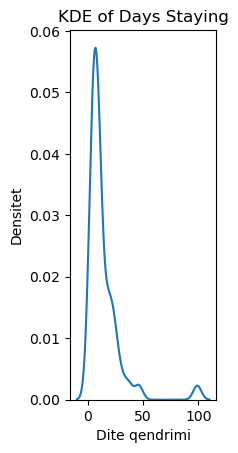

In [188]:
plt.subplot(1, 3, 2)
sns.kdeplot(te_dhenat['Dite qendrimi'], bw_adjust=0.5)
plt.title('KDE of Days Staying')
plt.xlabel('Dite qendrimi')
plt.ylabel('Densitet')

Text(0.5, 1.0, 'Q-Q Plot of Days Staying')

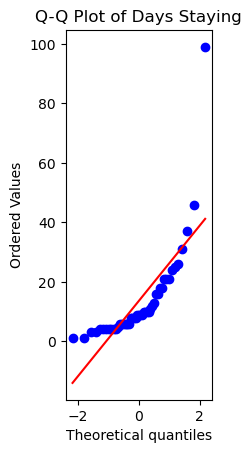

In [190]:
plt.subplot(1, 3, 3)
stats.probplot(te_dhenat['Dite qendrimi'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Days Staying')
